# Linear Regression

Linear regression models are good starting point for regression task. Such models are popular because they can be fit very quickly, and they are very interpretable.

The simple linear regression is a straight-line  fit to data
$$y = ax + b$$

Where a is commonly known as the slope, and b is commonly know as the intercept.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


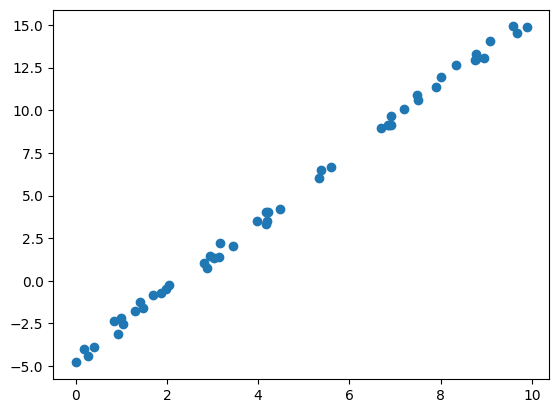

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.scatter(x,y);

In [4]:
model = LinearRegression(fit_intercept= True)

model.fit(x.reshape(50,1), y)

LinearRegression()

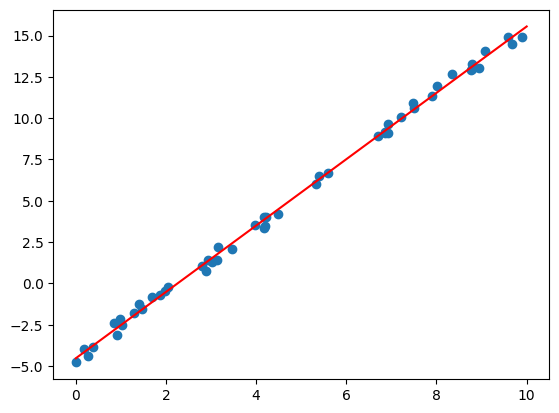

In [5]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit.reshape(1000,1))

plt.scatter(x, y)
plt.plot(xfit, yfit, color = 'red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_

In [13]:
print("Model slope:    ", model.coef_[0]) # In a simple model there is one coefficient 
print("Model intercept:", model.intercept_)

Model slope:     2.0082302432277492
Model intercept: -4.533652972099123


### Multiple linear regression

The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y = a_{0} + a_{1}x_{1} + a_{2}x_{2} + ...$$


In [14]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) # dot product

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


# Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. We can adjust the Hyperparameters to take our multidimensional linear model:

$$y = a_{0} + a_{1}x_{1} + a_{2}x_{2} + ...$$

and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$. That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:

$$y = a_{0} + a_{1}x_{1} + a_{2}x_{2}^{2} + a_{3}x_{3}^{3} + ...$$

Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$. This is a **Polynomial basis functions**.


In [17]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2,3,4])
poly = PolynomialFeatures(degree = 3, include_bias = False) # without bias
poly.fit_transform(x.reshape(3,1))

# the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [39]:
# we can accomplish this using a pipe line. Let's make a 7th-degree polynomial model in this way

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree = 7),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. For example, here is a sine wave with noise:

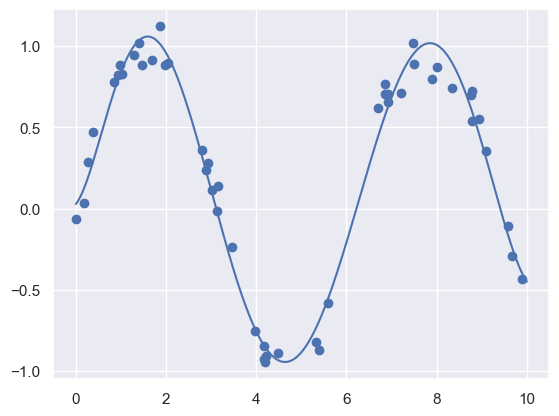

In [40]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x.reshape(50,1), y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Example: Predicting Bicycle Traffic

let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In [103]:
import pandas as pd
import numpy as np

In [104]:
url_1 = 'https://raw.githubusercontent.com/julihdez36/Machine_learning/main/Data/Fremont_Bridge_Bicycle_Counter.csv'
url_2 = 'https://raw.githubusercontent.com/julihdez36/Machine_learning/main/Data/BicycleWeather.csv'

counts = pd.read_csv(url_1, index_col= 'Date', parse_dates=True)
weather = pd.read_csv(url_2, index_col='DATE', parse_dates=True)


C:\Users\Julian\AppData\Local\Temp\ipykernel_15088\4172189766.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv(url_1, index_col= 'Date', parse_dates=True)


In [105]:
# Next we will compute the total daily bicycle traffic, and put this in its own dataframe:

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [106]:
# let's account for this in our data by adding binary columns that indicate the day of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html